In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
train = pd.read_csv('D:/train.csv')

In [15]:
test = pd.read_csv('D:/test.csv')

In [17]:
train.shape

(1460, 81)

In [19]:
test.shape

(1459, 80)

In [89]:
test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [121]:
train['SalePrice'].isnull().sum()

0

In [128]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [134]:
nl = (train.isnull().sum() / len(train) ) *100

In [138]:
nl.sort_values(ascending=False).head(10)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
dtype: float64

In [148]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

# Data Cleaning

In [170]:
# I gonna Remove those columns which have much Null Values
train_c = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

In [172]:
train_c.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [194]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [178]:
train_c[train_c['Id'].duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [188]:
from sklearn.impute import SimpleImputer

si = SimpleImputer()

train_c['LotFrontage'] = si.fit_transform(train_c[['LotFrontage']])

In [190]:
train_c['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [198]:
train_c.isnull().sum().sort_values(ascending=False).head(15)

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
Electrical       1
WoodDeckSF       0
BedroomAbvGr     0
2ndFlrSF         0
dtype: int64

In [206]:
train_c['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

## choose only 'float64'and 'int64' columns

In [220]:
df_n = train_c.select_dtypes(include = ['float64', 'int64'])

In [222]:
df_n.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [224]:
df_n.isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [238]:
df_n['GarageYrBlt'].describe()

count    1460.000000
mean     1979.976027
std        24.749688
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [232]:
si = SimpleImputer(strategy='most_frequent')

In [236]:
df_n['GarageYrBlt'] = si.fit_transform(df_n[['GarageYrBlt']])

In [251]:
df_n['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

# Feature Engineering
### I combine some two column to create new one. so, i can reduce Dimensionality
* 1stFlrSF + 2ndFlrSF = totalsqrft
* 'TotalBathrooms' = 'FullBath' + ('HalfBath' * 0.5)
* 'TotalBasementBaths'= 'BsmtFullBath' + ('BsmtHalfBath' * 0.5)
* 'HouseAge' = 'YrSold' - 'YearBuilt'
* 'YearsSinceRemod' = 'YrSold' - 'YearRemodAdd'
*  WoodDeck  ---> new column wooddeck (Y/N)
* 'BsmtFns'  ---> new column - BsmtFinSF1 finish or not

### I'm gonna Drope Some column
* 'PoolArea',3SsnPorch, ScreenPorch, EnclosedPorch ,'GarageYrBlt' ---> Drop
* 'BsmtFinSF2', 'MiscVal', 'Poolarea', 'Lowqulfinsf' ---> drope Bcz High number of zero
  

In [244]:
df_n['totalsqrft'] = df_n['1stFlrSF'] + df_n['2ndFlrSF']

In [253]:
df_n['totalsqrft'].describe()

count    1460.000000
mean     1509.619178
std       521.163523
min       334.000000
25%      1123.750000
50%      1458.000000
75%      1775.250000
max      5642.000000
Name: totalsqrft, dtype: float64

In [267]:
df_n = df_n.drop(['1stFlrSF','2ndFlrSF' ], axis=1)

In [269]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.000000,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0


In [282]:
df_n['3SsnPorch'].value_counts().head(7)

3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
Name: count, dtype: int64

In [284]:
df_n['EnclosedPorch'].value_counts().head(7)

EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
120       5
216       5
Name: count, dtype: int64

In [286]:
df_n['ScreenPorch'].value_counts().head(7)

ScreenPorch
0      1344
192       6
120       5
224       5
189       4
180       4
147       3
Name: count, dtype: int64

In [290]:
df_n['OpenPorchSF'].value_counts()

OpenPorchSF
0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: count, Length: 202, dtype: int64

In [322]:
porch = df_n[['OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch', 'SalePrice']]

In [ ]:
porch.corr()

In [340]:
rat = df_n[[ 'OverallQual' ,'OverallCond', 'SalePrice']]

In [342]:
rat.corr()

,OverallQual,OverallCond,SalePrice
OverallQual,1.000000,-0.091932,0.790982
OverallCond,-0.091932,1.000000,-0.077856
SalePrice,0.790982,-0.077856,1.000000


In [344]:
df_n.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'totalsqrft'],
      dtype='object')

In [348]:
df_n['FullBath'].value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [350]:
df_n['HalfBath'].value_counts()

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

In [502]:
df_n['TotalBathrooms'] = df_n['FullBath'] + (df_n['HalfBath'] * 0.5)

In [504]:
df_n['TotalBathrooms'].value_counts()

TotalBathrooms
1.0    469
2.0    433
2.5    334
1.5    180
3.0     20
3.5     18
0.5      3
0.0      3
Name: count, dtype: int64

In [506]:
def bath (val):
    if val < 1:
        return 0
    elif val < 2:
        return 1
    elif val < 3:
        return 2
    else:
        return 3

In [508]:
df_n['TotalBathrooms'] = df_n['TotalBathrooms'].apply(bath)

In [516]:
df_n['TotalBathrooms'].value_counts()

TotalBathrooms
2    767
1    649
3     38
0      6
Name: count, dtype: int64

In [510]:
df_n['TotalBasementBaths'] = df_n['BsmtFullBath'] + (df_n['BsmtHalfBath'] * 0.5)

In [512]:
df_n['TotalBasementBaths'] = df_n['TotalBasementBaths'].apply(bath)

In [514]:
df_n['TotalBasementBaths'].value_counts()

TotalBasementBaths
0    854
1    590
2     15
3      1
Name: count, dtype: int64

In [382]:
df_n.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'totalsqrft', 'TotalBathrooms',
       'TotalBasementBaths'],
      dtype='object')

In [378]:
df_n['BedroomAbvGr'].value_counts()

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

In [414]:
df_n['HouseAge'] = df_n['YrSold'] - df_n['YearBuilt']

In [421]:
df_n['YearsSinceRemod'] = df_n['YrSold'] - df_n['YearRemodAdd']

In [428]:
gy = (df_n['GarageYrBlt'] == df_n['YearBuilt']).astype(int)

In [435]:
df_n['WoodDeckSF'].value_counts()

WoodDeckSF
0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: count, Length: 274, dtype: int64

In [437]:
def cat_w(df):
    if df == 0:
        return 0
    else:
        return 1

In [439]:
df_n['WoodDeck'] = df_n['WoodDeckSF'].apply(cat_w)

In [441]:
df_n['WoodDeck'].value_counts()

WoodDeck
0    761
1    699
Name: count, dtype: int64

In [447]:
df_n['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [451]:
df_n['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [453]:
df_n['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [463]:
df_n['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

In [468]:
def bs_fns (val):
    if val == 0:
        return 0
    else:
        return 1

In [470]:
df_n['BsmtFns'] = df_n['BsmtFinSF1'].apply(bs_fns)

In [472]:
df_n['BsmtFns'].value_counts()

BsmtFns
1    993
0    467
Name: count, dtype: int64

In [477]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   OverallQual         1460 non-null   int64  
 5   OverallCond         1460 non-null   int64  
 6   YearBuilt           1460 non-null   int64  
 7   YearRemodAdd        1460 non-null   int64  
 8   MasVnrArea          1452 non-null   float64
 9   BsmtFinSF1          1460 non-null   int64  
 10  BsmtFinSF2          1460 non-null   int64  
 11  BsmtUnfSF           1460 non-null   int64  
 12  TotalBsmtSF         1460 non-null   int64  
 13  LowQualFinSF        1460 non-null   int64  
 14  GrLivArea           1460 non-null   int64  
 15  BsmtFullBath        1460 non-null   int64  
 16  BsmtHa

In [481]:
df = df_n.drop(['YearBuilt','FullBath', 'HalfBath','BsmtHalfBath' ,'BsmtFullBath','BsmtFinSF1','BsmtFinSF2','YearRemodAdd','MoSold','YrSold','EnclosedPorch', '3SsnPorch','ScreenPorch', 'WoodDeckSF', 'GarageYrBlt'],axis=1)

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   LotFrontage         1460 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   OverallQual         1460 non-null   int64  
 5   OverallCond         1460 non-null   int64  
 6   MasVnrArea          1452 non-null   float64
 7   BsmtUnfSF           1460 non-null   int64  
 8   TotalBsmtSF         1460 non-null   int64  
 9   LowQualFinSF        1460 non-null   int64  
 10  GrLivArea           1460 non-null   int64  
 11  BedroomAbvGr        1460 non-null   int64  
 12  KitchenAbvGr        1460 non-null   int64  
 13  TotRmsAbvGrd        1460 non-null   int64  
 14  Fireplaces          1460 non-null   int64  
 15  GarageCars          1460 non-null   int64  
 16  Garage

In [528]:
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [546]:
df['TotRmsAbvGrd'].value_counts()

TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64

In [573]:
df['MiscVal'].value_counts().head()

MiscVal
0      1408
400      11
500       8
700       5
450       4
Name: count, dtype: int64

In [575]:
df['PoolArea'].value_counts().head()

PoolArea
0      1453
512       1
648       1
576       1
555       1
Name: count, dtype: int64

In [577]:
df['LowQualFinSF'].value_counts().head()

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
Name: count, dtype: int64

In [582]:
df = df.drop(['MiscVal', 'PoolArea','LowQualFinSF'],axis=1)

# Feature Selection
* 'GrLivArea', 'GarageCars', 'OverallQual'  --> Droped due to high Correlation

<Axes: >

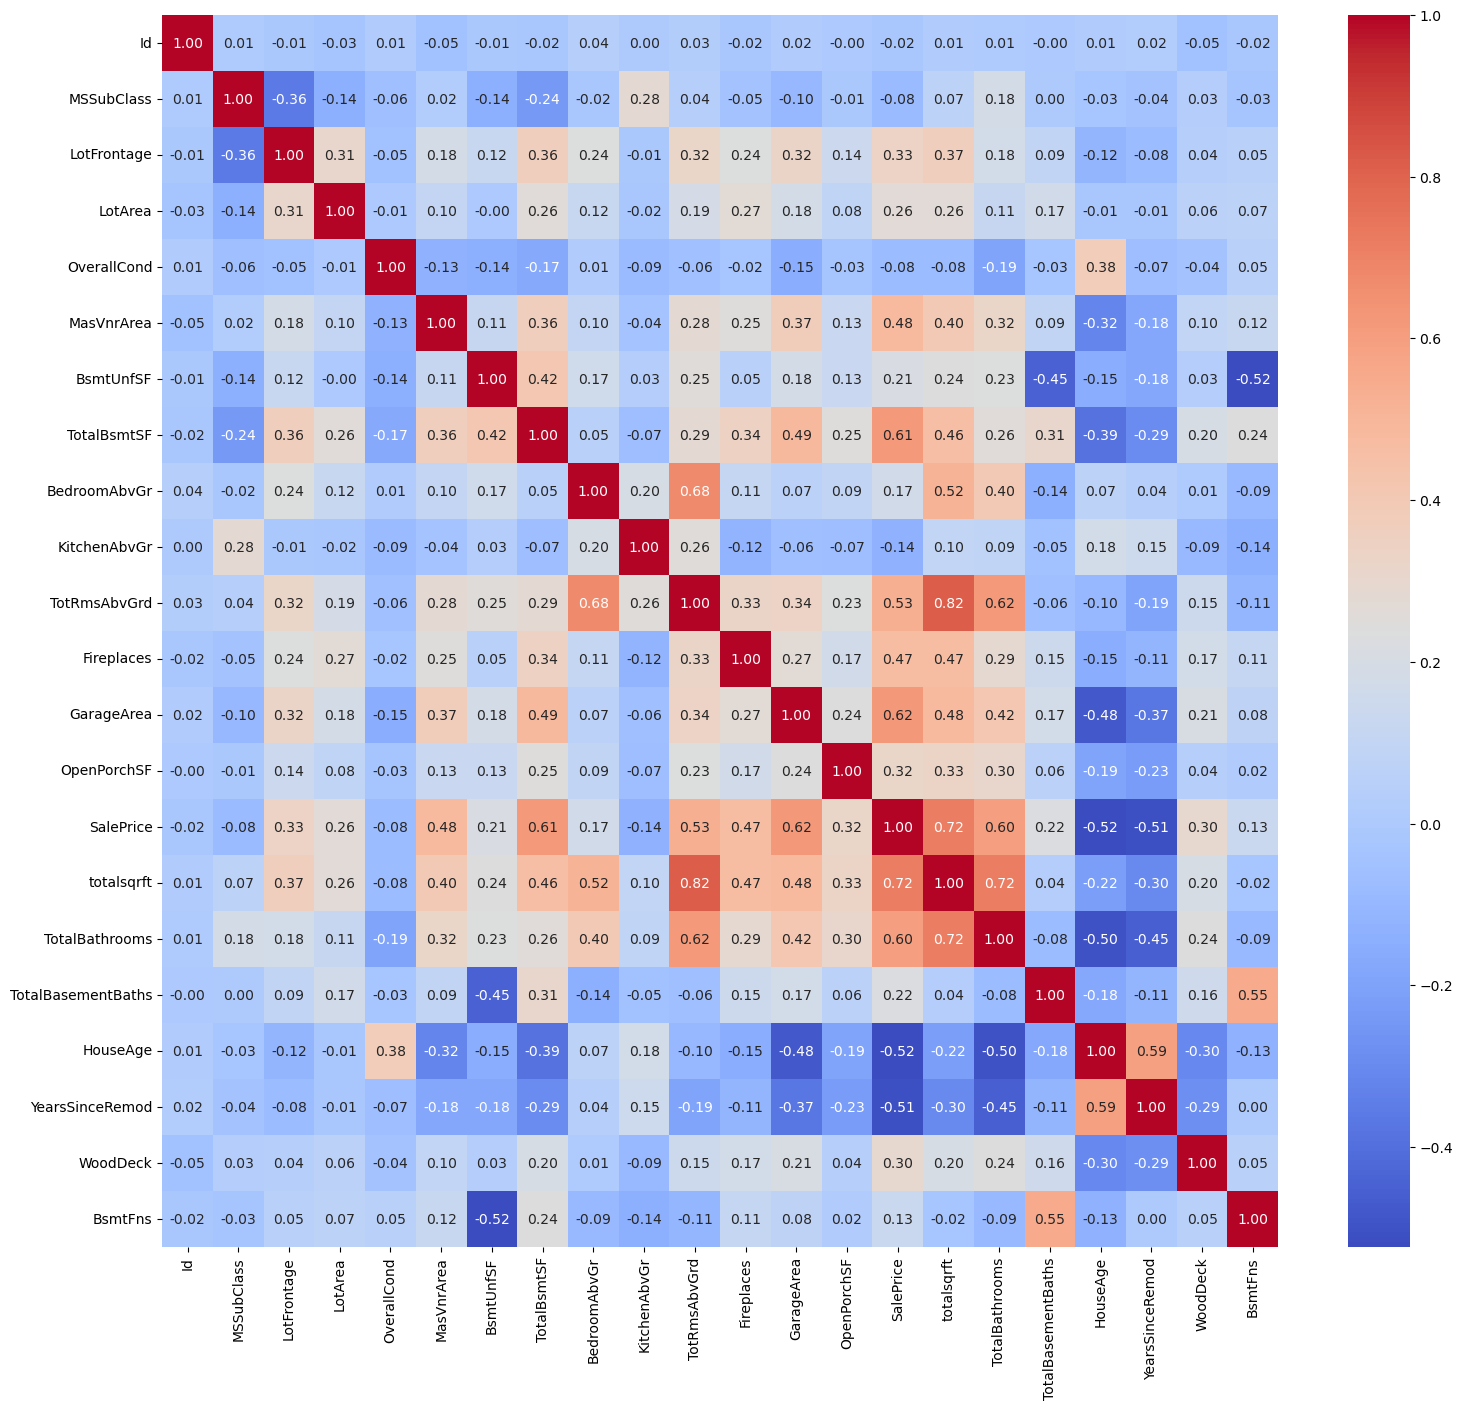

In [584]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
df = df.drop(['GrLivArea', 'GarageCars'], axis=1)

In [ ]:
df = df.drop('OverallQual', axis=1)

In [586]:
df.shape

(1460, 22)

In [559]:
col = df.columns

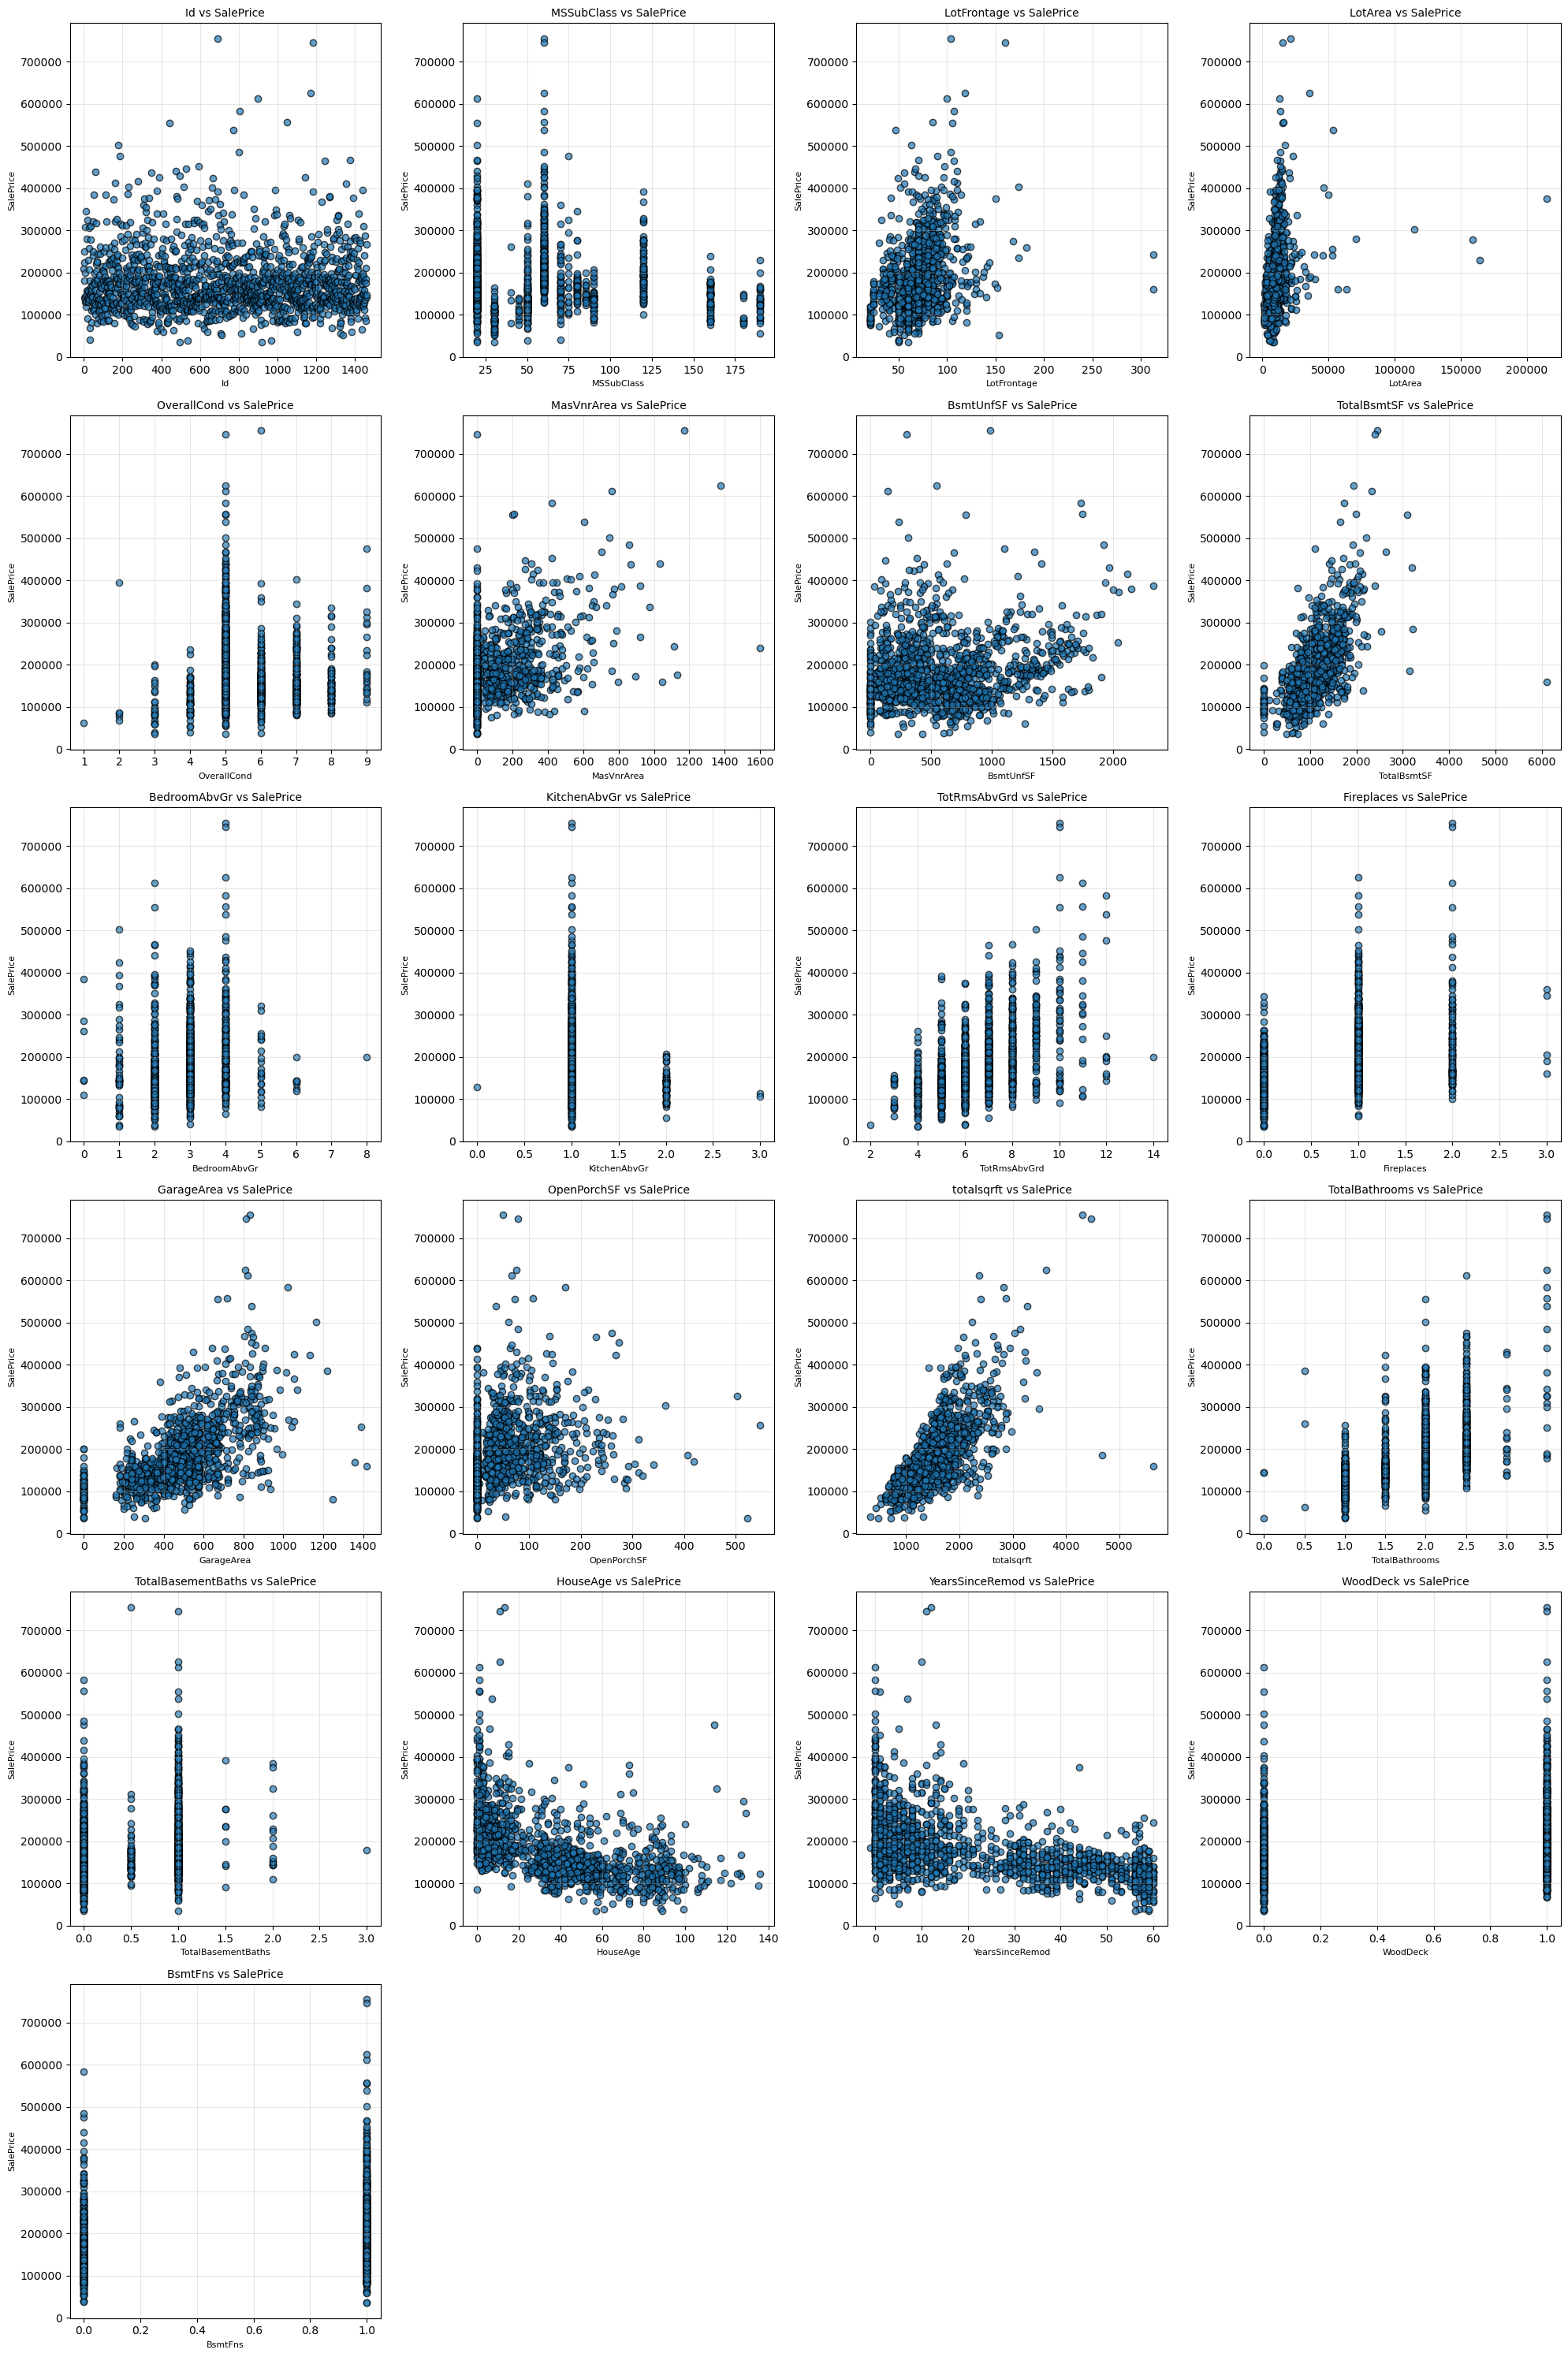

In [588]:
import math


feature_columns = [col for col in df.columns if col != 'SalePrice'] 
target_column = 'SalePrice' 


n_features = len(feature_columns)
cols = 4  # Number of columns in the grid
rows = math.ceil(n_features / cols)  # Calculate the number of rows


fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten() 


for i, feature in enumerate(feature_columns):
    ax = axes[i]
    ax.scatter(df[feature], df[target_column], alpha=0.7, edgecolor='k')
    ax.set_title(f'{feature} vs {target_column}', fontsize=10)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel(target_column, fontsize=8)
    ax.grid(alpha=0.3)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [590]:
df.shape

(1460, 22)

In [641]:
df_n = df.drop(['SalePrice', 'Id'], axis=1)


# Scalling 

In [643]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_n = ss.fit_transform(df.drop(['SalePrice', 'Id'], axis=1)) 
Y = ss.fit_transform(df[['SalePrice']])

In [645]:
x.shape

(1460, 21)

In [653]:
X

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,totalsqrft,TotalBathrooms,TotalBasementBaths,HouseAge,YearsSinceRemod,WoodDeck,BsmtFns
0,0.073375,-0.229372,-0.207142,-0.517200,0.510015,-0.944591,-0.459303,0.163779,-0.211454,0.912210,-0.951226,0.351000,0.216503,0.384619,1.169387,1.060397,-1.043259,-0.869941,-0.958399,0.685778
1,-0.872563,0.451936,-0.091886,2.179628,-0.572835,-0.641228,0.466465,0.163779,-0.211454,-0.318683,0.600495,-0.060731,-0.704483,-0.475290,0.382973,0.089142,-0.183465,0.390141,1.043407,0.685778
2,0.073375,-0.093110,0.073480,-0.517200,0.322174,-0.301643,-0.313369,0.163779,-0.211454,-0.318683,0.600495,0.631726,-0.070361,0.530497,1.169387,1.060397,-0.977121,-0.821476,-0.958399,0.685778
3,0.309859,-0.456474,-0.096897,-0.517200,-0.572835,-0.061670,-0.687324,0.163779,-0.211454,0.296763,0.600495,0.790804,-0.176048,0.398055,-1.189855,1.060397,1.800676,0.632464,-0.958399,0.685778
4,0.073375,0.633618,0.375148,-0.517200,1.360826,-0.174865,0.199680,1.390023,-0.211454,1.527656,0.600495,1.698485,0.563760,1.321306,1.169387,1.060397,-0.944052,-0.724547,1.043407,0.685778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.517200,-0.572835,0.873321,-0.238122,0.163779,-0.211454,0.296763,0.600495,-0.060731,-0.100558,0.263694,1.169387,-0.882112,-0.944052,-0.773012,-0.958399,-1.458197
1456,-0.872563,0.679039,0.266407,0.381743,0.084610,0.049262,1.104925,0.163779,-0.211454,0.296763,2.152216,0.126420,-0.704483,1.081376,0.382973,1.060397,-0.150396,-0.046041,1.043407,0.685778
1457,0.309859,-0.183951,-0.147810,3.078570,-0.572835,0.701265,0.215641,1.390023,-0.211454,1.527656,2.152216,-1.033914,0.201405,1.593867,0.382973,-0.882112,1.073157,-0.918406,-0.958399,0.685778
1458,-0.872563,-0.093110,-0.080160,0.381743,-0.572835,-1.284176,0.046905,-1.062465,-0.211454,-0.934130,-0.951226,-1.090059,-0.704483,-0.828468,-1.189855,1.060397,0.775536,-0.433759,1.043407,0.685778


In [651]:
X = pd.DataFrame(X_n, columns=df_n.columns)

# REF

In [841]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=50, random_state=42 )

rfe = RFE(estimator=rf, n_features_to_select=15)

rfe.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    n_features_to_select=15)

In [673]:
X_train_rfe = rfe.transform(X_train)

In [675]:
X_train_rfe.shape

(1168, 15)

In [679]:
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'OpenPorchSF', 'totalsqrft', 'TotalBathrooms', 'TotalBasementBaths',
       'HouseAge', 'YearsSinceRemod'],
      dtype='object')

# Using This 15 Columns

In [701]:
rc = df_n[['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'OpenPorchSF', 'totalsqrft', 'TotalBathrooms', 'TotalBasementBaths',
       'HouseAge', 'YearsSinceRemod']]

In [883]:
rc

,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,totalsqrft,TotalBathrooms,TotalBasementBaths,HouseAge,YearsSinceRemod
0,65.0,8450,5,1,150,856,8,0,548,1,1710,2,1,5,5
1,80.0,9600,8,0,284,1262,6,1,460,0,1262,2,0,31,31
2,68.0,11250,5,1,434,920,6,1,608,1,1786,2,1,7,6
3,60.0,9550,5,0,540,756,7,1,642,1,1717,1,1,91,36
4,84.0,14260,5,1,490,1145,9,1,836,1,2198,2,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,5,0,953,953,7,1,460,1,1647,2,0,8,7
1456,85.0,13175,6,1,589,1542,7,2,500,0,2073,2,1,32,22
1457,66.0,9042,9,0,877,1152,9,2,252,1,2340,2,0,69,4
1458,68.0,9717,6,0,0,1078,5,0,240,0,1078,1,1,60,14


In [869]:
rc['TotalBathrooms'].value_counts()

TotalBathrooms
1.0    469
2.0    433
2.5    334
1.5    180
3.0     20
3.5     18
0.5      3
0.0      3
Name: count, dtype: int64

In [867]:
# Need to encode some Feature

def yn (val):
    if val == 0:
        return 0
    else:
        return 1

In [873]:
rc['MasVnrArea'] = rc['MasVnrArea'].apply(yn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\3697319923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['MasVnrArea'] = rc['MasVnrArea'].apply(yn)


In [875]:
rc['OpenPorchSF'] = rc['OpenPorchSF'].apply(yn)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\762543206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['OpenPorchSF'] = rc['OpenPorchSF'].apply(yn)


In [877]:
def bath (val):
    if val < 1:
        return 0
    elif val < 2:
        return 1
    elif val < 3:
        return 2
    else:
        return 3

In [879]:
rc['TotalBathrooms'] = rc['TotalBathrooms'].apply(bath)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\138394973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['TotalBathrooms'] = rc['TotalBathrooms'].apply(bath)


In [881]:
rc['TotalBasementBaths'] = rc['TotalBasementBaths'].apply(bath)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\2749564676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['TotalBasementBaths'] = rc['TotalBasementBaths'].apply(bath)


# rc Scaling

In [885]:
ss = StandardScaler()

In [891]:
rc['LotFrontage'] = ss.fit_transform(rc[['LotFrontage']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\2844950513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['LotFrontage'] = ss.fit_transform(rc[['LotFrontage']])


In [895]:
rc['LotArea'] = ss.fit_transform(rc[['LotArea']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\968601207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['LotArea'] = ss.fit_transform(rc[['LotArea']])


In [897]:
rc['BsmtUnfSF'] = ss.fit_transform(rc[['BsmtUnfSF']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\540149324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['BsmtUnfSF'] = ss.fit_transform(rc[['BsmtUnfSF']])


In [899]:
rc['TotalBsmtSF'] = ss.fit_transform(rc[['TotalBsmtSF']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\1046600169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['TotalBsmtSF'] = ss.fit_transform(rc[['TotalBsmtSF']])


In [901]:
rc['GarageArea'] = ss.fit_transform(rc[['GarageArea']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\2921531806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['GarageArea'] = ss.fit_transform(rc[['GarageArea']])


In [903]:
rc['totalsqrft'] = ss.fit_transform(rc[['totalsqrft']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\2258363402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['totalsqrft'] = ss.fit_transform(rc[['totalsqrft']])


In [905]:
rc['HouseAge'] = ss.fit_transform(rc[['HouseAge']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\915359626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['HouseAge'] = ss.fit_transform(rc[['HouseAge']])


In [907]:
rc['YearsSinceRemod'] = ss.fit_transform(rc[['YearsSinceRemod']])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2644\568455482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['YearsSinceRemod'] = ss.fit_transform(rc[['YearsSinceRemod']])


In [909]:
rc.head()

,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,totalsqrft,TotalBathrooms,TotalBasementBaths,HouseAge,YearsSinceRemod
0,-0.229372,-0.207142,5,1,-0.944591,-0.459303,8,0,0.351000,1,0.384619,2,1,-1.043259,-0.869941
1,0.451936,-0.091886,8,0,-0.641228,0.466465,6,1,-0.060731,0,-0.475290,2,0,-0.183465,0.390141
2,-0.093110,0.073480,5,1,-0.301643,-0.313369,6,1,0.631726,1,0.530497,2,1,-0.977121,-0.821476
3,-0.456474,-0.096897,5,0,-0.061670,-0.687324,7,1,0.790804,1,0.398055,1,1,1.800676,0.632464
4,0.633618,0.375148,5,1,-0.174865,0.199680,9,1,1.698485,1,1.321306,2,1,-0.944052,-0.724547


In [911]:
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [913]:
X_train, X_test, y_train, y_test = train_test_split(rc, y, test_size=0.2, random_state=42)

In [915]:
X_train.shape

(1168, 15)

# Model Selection

In [921]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [923]:
models = {
    'gb' : GradientBoostingRegressor(random_state=42),
    'rf' : RandomForestRegressor(random_state=42),
    'lr' : LinearRegression(),
    'sg' : SGDRegressor(random_state=42),
    'xg' : XGBRegressor(random_state=42)
}

In [927]:
result=[]

for name,model in models.items():
    
    model.fit(X_train, y_train)

    yp = model.predict(X_test)
    r2 = r2_score(yp,y_test)
    mse = mean_squared_error(yp, y_test)

    result.append({
        'Model':name,
        'r2': r2,
        'mse': mse
    })

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [929]:
result

[{'Model': 'gb', 'r2': 0.880940674693343, 'mse': 0.11735293456880908},
 {'Model': 'rf', 'r2': 0.8457519616051081, 'mse': 0.13678109661536386},
 {'Model': 'lr', 'r2': 0.6286058051172277, 'mse': 0.2727418510630093},
 {'Model': 'sg', 'r2': 0.4592951386668409, 'mse': 0.31392988453779114},
 {'Model': 'xg', 'r2': 0.8155313730239868, 'mse': 0.17100944229711945}]

# HyperParameter Tuning

In [932]:
from sklearn.model_selection import RandomizedSearchCV

In [944]:
prm = {
    'n_estimators' : [50, 100, 150],
    'subsample' : [0.7,0.9,1],
    'learning_rate' : [0.05, 0.1 ],
    'max_depth' : [3,4,5,6],
}

In [946]:
gb = GradientBoostingRegressor(random_state=42)

In [948]:
rcv = RandomizedSearchCV(
    estimator= gb,
    param_distributions=prm,
    n_iter=50,
    n_jobs=-1,
    random_state=42,
    scoring= 'r2',
    cv = 5
)

In [950]:
rcv.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150],
                                        'subsample': [0.7, 0.9, 1]},
                   random_state=42, scoring='r2')

In [952]:
rcv.best_score_

0.8107135770900857

In [955]:
rcv.best_params_

{'subsample': 0.9, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05}

# Model Training on Best Parameter

In [958]:
gb = GradientBoostingRegressor(
    subsample=0.9,
    n_estimators=150,
    max_depth=5,
    learning_rate=0.05
)

In [960]:
gb.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=150,
                          subsample=0.9)

In [962]:
y_pred = gb.predict(X_test)
r2 = r2_score(y_pred,y_test)

In [964]:
r2

0.8745635492344976